<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime
from sklearn import metrics
import statsmodels.api as sm

In [6]:
sac_csv = pd.read_csv('./datasets/sacramento_real_estate_transactions.csv')

In [3]:
# A:
sac_csv.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**
* `sq__ft` needs to be renamed so it just has one `_`
* `sq_ft` has negative values, zeroes, that need to be removed
* `price` has some weird numbers, 4897, removed those rows. Also had a very large house available for 2000, so I checked to see if it was still on the market, then removed it from the dataframe.

* `price` and `sq_ft` are not normally distributed, both are skewed right!

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [4]:
# A:

sac_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [5]:
sac_csv['sale_date'] = pd.to_datetime(sac_csv['sale_date'])

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [6]:
sac_csv['sale_date'].dtypes

dtype('<M8[ns]')

In [7]:
sac_csv.zip.value_counts()

95648    72
95823    61
95828    45
95758    44
95838    37
         ..
95633     1
95635     1
95655     1
95690     1
95722     1
Name: zip, Length: 68, dtype: int64

In [8]:
sac_csv.rename(columns={'sq__ft': 'sq_ft'}, inplace=True)

In [9]:
# uhhhh how are there negative square footages and prices? Also woah can a home have no beds/baths
sac_csv[['sq_ft','price', 'beds', 'baths']].describe().T

count           mean            std       min       25%       50%  \
sq_ft  985.0    1312.918782     856.123224    -984.0     950.0    1304.0   
price  985.0  233715.951269  139088.818896 -210944.0  145000.0  213750.0   
beds   985.0       2.911675       1.307932       0.0       2.0       3.0   
baths  985.0       1.776650       0.895371       0.0       1.0       2.0   

            75%       max  
sq_ft    1718.0    5822.0  
price  300000.0  884790.0  
beds        4.0       8.0  
baths       2.0       5.0

In [10]:
# Checking to see how many negative sq_ft and price, it's only one, yay!
# sac_csv[sac_csv['sq_ft'] < 0]['sq_ft']
sac_csv[sac_csv['sq_ft'] < 0]['sq_ft']

703   -984
Name: sq_ft, dtype: int64

In [11]:
sac_csv[sac_csv['price'] < 0]['price']

703   -210944
Name: price, dtype: int64

In [12]:
sac_csv.describe().T

count           mean            std            min            25%  \
zip        985.0   95750.697462      85.176072   95603.000000   95660.000000   
beds       985.0       2.911675       1.307932       0.000000       2.000000   
baths      985.0       1.776650       0.895371       0.000000       1.000000   
sq_ft      985.0    1312.918782     856.123224    -984.000000     950.000000   
price      985.0  233715.951269  139088.818896 -210944.000000  145000.000000   
latitude   985.0      38.445121       5.103637    -121.503471      38.482704   
longitude  985.0    -121.193371       5.100670    -121.551704    -121.446119   

                     50%            75%            max  
zip         95762.000000   95828.000000   95864.000000  
beds            3.000000       4.000000       8.000000  
baths           2.000000       2.000000       5.000000  
sq_ft        1304.000000    1718.000000    5822.000000  
price      213750.000000  300000.000000  884790.000000  
latitude       38.625932      38.695589      39.020808  
longitude    -121.375799    -121.294893      38.668433

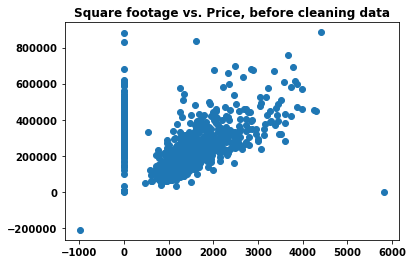

In [13]:
# Let's take a look at the sq_ft vs price now and see what we're working with
plt.scatter(sac_csv['sq_ft'], sac_csv['price'])
plt.title('Square footage vs. Price, before cleaning data')
plt.xlabel('');

In [14]:
# There are some places with Zero for beds, baths, and sq ft. What's going on there? Uh oh...
sac_csv['sq_ft'].value_counts()

0       171
1120      8
795       6
1410      5
1039      5
       ... 
1656      1
876       1
1659      1
2687      1
1235      1
Name: sq_ft, Length: 604, dtype: int64

In [15]:
# And it looks like some odd data in the price column, too.
sac_csv['price'].value_counts()

4897      49
220000    10
150000     9
250000     9
170000     9
          ..
212500     1
579093     1
300567     1
63000      1
512000     1
Name: price, Length: 605, dtype: int64

In [16]:
# can I fill these with anything or should I just drop them? I'll drop them for now

In [17]:
neg_sq_ft = sac_csv['sq_ft'] < 0
sac_csv[neg_sq_ft] = sac_csv[neg_sq_ft][['sq_ft', 'price']].apply('abs')

In [18]:
sac_csv = sac_csv[(sac_csv['sq_ft'] != 0) & (sac_csv['price'] != 4897)]

In [19]:
sac_csv['price'].describe() # There's still a house that has a 2000 price, let's see where that is

count       814.000000
mean     229448.369779
std      119825.576060
min        2000.000000
25%      148750.000000
50%      207986.500000
75%      284973.250000
max      884790.000000
Name: price, dtype: float64

In [20]:
sac_csv[sac_csv['price'] == 2000] # uhhhh yeah that's a huge house. 2000 is not right, let's drop it, too.

street         city      zip state  beds  baths  sq_ft  \
866  14151 INDIO DR  SLOUGHHOUSE  95683.0    CA   3.0    4.0   5822   

            type  sale_date  price   latitude   longitude  
866  Residential 2008-05-16   2000  38.490447 -121.129337

In [21]:
sac_csv = sac_csv[sac_csv['price'] != 2000]

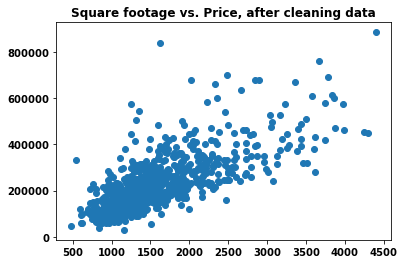

In [22]:
# one final check to see what the data's looking like now
plt.scatter(sac_csv['sq_ft'], sac_csv['price'])
plt.title('Square footage vs. Price, after cleaning data')
plt.xlabel('');

## Okay! Now I can start exploring relationships

In [23]:
sac_csv[['beds', 'baths', 'sq_ft', 'price']].describe().T

count           mean            std      min       25%       50%  \
beds   812.0       3.247537       0.849490      1.0       3.0       3.0   
baths  812.0       1.959360       0.665940      1.0       2.0       2.0   
sq_ft  813.0    1585.942189     647.423526    484.0    1144.0    1418.0   
price  813.0  229728.134071  119633.032607  30000.0  148750.0  208000.0   

            75%       max  
beds        4.0       8.0  
baths       2.0       5.0  
sq_ft    1851.0    4400.0  
price  285000.0  884790.0

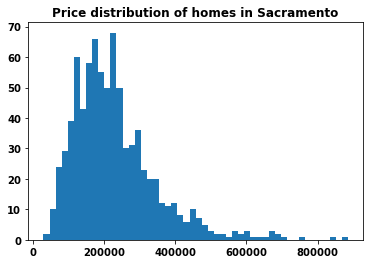

In [24]:
# Price distribution is skewed right
plt.hist(sac_csv.price, bins=50)
plt.title('Price distribution of homes in Sacramento');

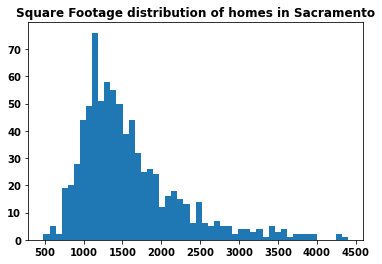

In [25]:
plt.hist(sac_csv.sq_ft, bins=50)
plt.title('Square Footage distribution of homes in Sacramento');

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [26]:
def subplot_scatterplots(dataframe, list_of_column_pairs, list_of_titles, list_of_labels): # Heyyy this function is from the SAT project!
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(21, 14))
    for i, column_pair in enumerate(list_of_column_pairs):
        i += 1 # Need to add 1 since plt.subplot starts at index 1
        subplot = int(str(2) + str(3) + str(i)) # = 231, for example
        plt.subplot(subplot)
        i -= 1 # Now remove 1 from i since the lists of column pairs, etc, begin at index 0
        plt.scatter(dataframe[list_of_column_pairs[i][0]], # First entry in column pair
                    dataframe[list_of_column_pairs[i][1]], # Second entry in column pair
                    alpha=0.7)
        plt.title(''.join(list_of_titles[i]),
                  fontsize=15,
                  pad=15)
        plt.xlabel(list_of_labels[i][0],
                   fontsize=12)
        plt.ylabel(list_of_labels[i][1],
                   fontsize=12)

In [27]:
# A:
features = ['beds', 'baths', 'sq_ft', 'latitude', 'longitude']
y_zip = ['price'] * len(features)
columns_for_plotting = list(zip(features, y_zip))
list_of_titles = ['Price vs. Number of Beds', 'Price vs. Number of Baths', 'Price vs. Sq_ft', 'Price vs. Latitude', 'Price vs. Longitude']

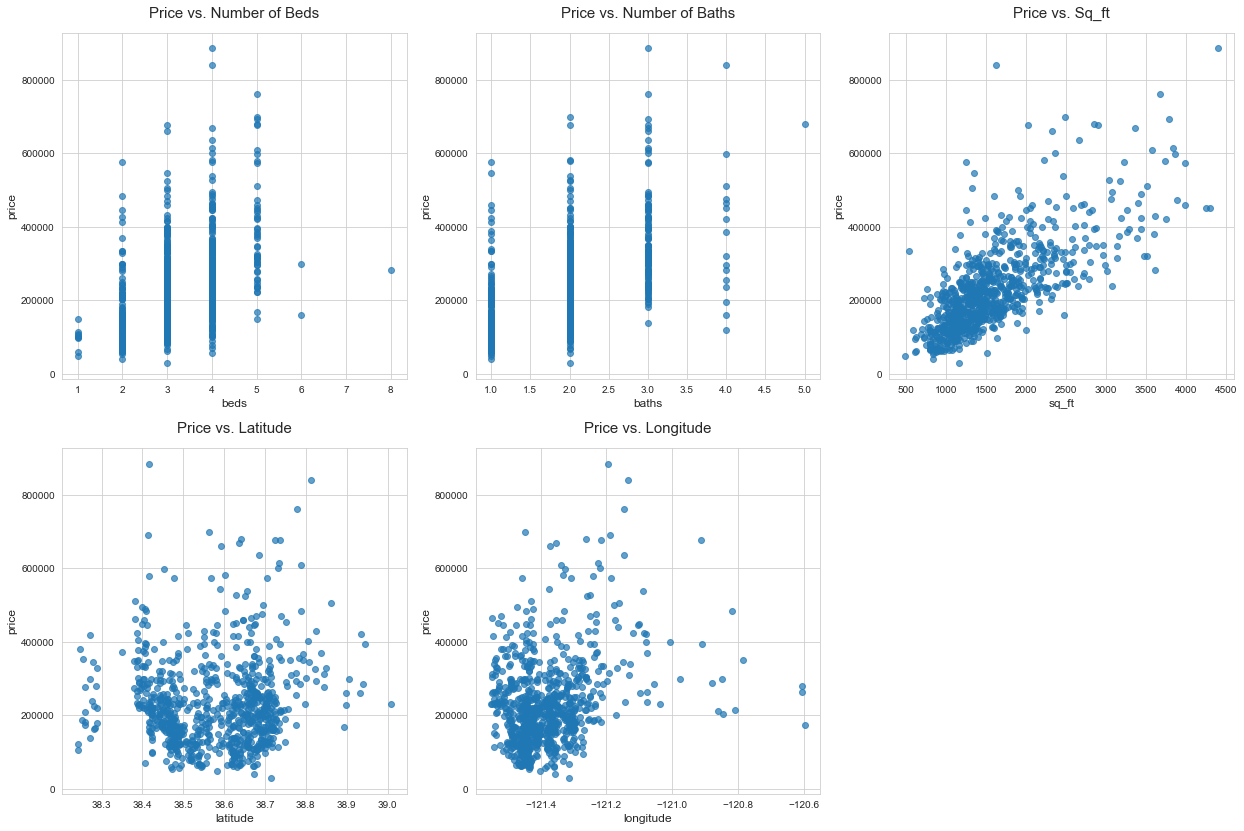

In [28]:
subplot_scatterplots(sac_csv, columns_for_plotting, list_of_titles, columns_for_plotting)

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [29]:
sac_csv.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

*Price vs. Sq Footage. It is the relationship with the most easily visible linear relationship.*

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [30]:
# A:
def linreg_slope_coef(X, y):
    linreg = LinearRegression()
    linreg.fit(X, y)
    return linreg.intercept_, linreg.coef_

In [31]:
X = sac_csv[['sq_ft']]
y = sac_csv['price']

### 6. Interpret the intercept. Interpret the slope.

In [32]:
# A:
linreg_slope_coef(X, y)


(16195.545596351643, array([134.64083994]))

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

### Prediction: 
What will a home's price be if it is 1500 sq. ft?

### Inference:
How large of a home will someone be able to afford for under \$200,000


### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [33]:
# A:
def plot_resids(X, y):
    linreg = LinearRegression()
    linreg.fit(X, y)
    y_pred = linreg.predict(X)
    resids = y - y_pred
    plt.scatter(y_pred, resids)
    plt.axhline(0, c='r')
    plt.title(f'Linear Regression Residuals: {y.name.title()} vs. {X.columns[0].replace("_", " ").title()}') # Pandas Documentation ftw!

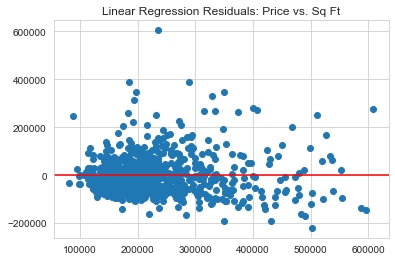

In [34]:
plot_resids(X, y)

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [35]:
def category_to_dummies(dataframe, column):
    dummy_split = pd.get_dummies(dataframe[column], column, drop_first=True) # Creates dummy columns with the name {column}_{value_in_row} per get_dummies documentation
    for dummy_key in dummy_split: # Iterates through dummy_key in dummy_split
        dataframe[dummy_key] = dummy_split[dummy_key] # adds new columns named {dummy_key} to original dataframe

In [36]:
category_to_dummies(sac_csv, 'type')

In [37]:
sac_csv.drop(columns='type', inplace=True)

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [38]:
# Not sure what you're asking for in this question, but I'm looking for "Unkown":
for column in sac_csv.columns:
    try:
        print(sac_csv[column].str.contains('Unkown').sum())
    except:
        pass

0
0
0


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [39]:
# A:
sq_ft = sac_csv['sq_ft']
sac_csv['small_homes'] = np.where(sq_ft < sq_ft.mean() - (sq_ft.std()), 1, 0)

In [40]:
sac_csv['large_homes'] = np.where((sq_ft.mean() + 2 * sq_ft.std() > sq_ft) & (sq_ft > sq_ft.mean() + sq_ft.std()), 1, 0)

In [41]:
sac_csv['huge_homes'] = np.where(sq_ft > sq_ft.mean() +  2 * sq_ft.std(), 1, 0)

In [42]:
sac_csv = sac_csv.dropna()

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [43]:
sac_csv.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq_ft', 'sale_date',
       'price', 'latitude', 'longitude', 'type_Multi-Family',
       'type_Residential', 'small_homes', 'large_homes', 'huge_homes'],
      dtype='object')

In [44]:
# A:
features = ['small_homes', 'large_homes', 'huge_homes', 'sq_ft', 'type_Multi-Family', 'type_Residential', 'beds', 'baths']

In [45]:
linreg = LinearRegression()
X = sac_csv[features]
y = sac_csv['price']

In [46]:
linreg.fit(X, y)

LinearRegression()

In [47]:
y_pred = linreg.predict(X)

In [48]:
resids = y - y_pred

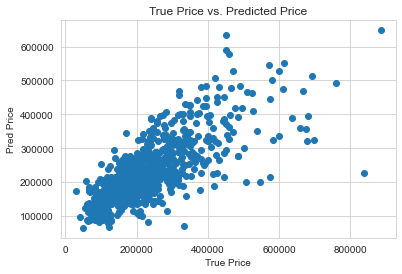

In [49]:
plt.scatter(y, y_pred)
plt.title('True Price vs. Predicted Price')
plt.xlabel('True Price')
plt.ylabel('Pred Price');

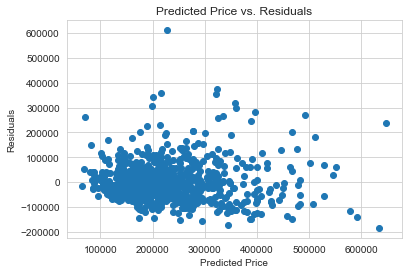

In [50]:
plt.scatter(y_pred, resids)
plt.title('Predicted Price vs. Residuals')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals');

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

Taken from https://www.statisticssolutions.com/wp-content/uploads/wp-post-to-pdf-enhanced-cache/1/assumptions-of-multiple-linear-regression.pdf
- **Linear relationship**
- **Multivariate Normality** (kind of the same)
- No Multicollinearity
- No auto-correlation
- **Homoscedasticity** (Equal Variances)

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

* **Linear relationship** - Yeah, it's pretty linear, there are a few outliers but in general it's linear
* **Homoscedasticity** - No, there's a pretty dense cluster around (200000, 0)

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [51]:
X.loc[:, 'intercept'] = 1

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
# A:
model = sm.OLS(y,X).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     127.1
Date:                Thu, 06 Aug 2020   Prob (F-statistic):          4.39e-137
Time:                        00:43:21   Log-Likelihood:                -10314.
No. Observations:                 812   AIC:                         2.065e+04
Df Residuals:                     803   BIC:                         2.069e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
small_homes       -2.099e+04   1.24e+04     -1.689      0.092   -4.54e+04    3405.713
large_homes       -1.564e+04   1.41e+04     -1.110      0.267   -4.33e+04     1.2e+04
huge_homes        -5.622e+04   2.25e+04     -2.497      0.013      -1e+05    -1.2e+04
sq_ft               172.7765     11.012     15.689      0.000     151.160     194.393
type_Multi-Family  -2.55e+04   2.75e+04     -0.926      0.355   -7.96e+04    2.86e+04
type_Residential   2.732e+04   1.43e+04      1.907      0.057    -805.977    5.54e+04
beds              -3.046e+04   5365.850     -5.676      0.000    -4.1e+04   -1.99e+04
baths              3063.4051   6619.097      0.463      0.644   -9929.369    1.61e+04
intercept          2.958e+04   2.02e+04      1.467      0.143      -1e+04    6.92e+04
==============================================================================
Omnibus:                      326.657   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1964.034
Skew:                           1.716   Prob(JB):                         0.00
Kurtosis:                       9.802   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [54]:
# A:
def r2_adj(X, y):
    n = len(X)
    k = len(X.columns)
    r2 = model.rsquared
    return 1 - (((1-r2)*(n-1)/
                 (n-k-1)))

r2_adj(X, y)

0.5537531215994034

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [55]:
# A:
def metric_mayhem(X, y):
    model = sm.OLS(y,X).fit()
    print('MSE:')
    print(metrics.mean_squared_error(y, model.predict()), '\n')
    print('RMSE:')
    print(metrics.mean_squared_error(y, model.predict(), squared=False), '\n')
    print('MAE:')
    print(metrics.mean_absolute_error(y, model.predict()), '\n')
    print('R Squared:')
    print(model.rsquared, '\n')
    print('Adjusted R Squared')
    print(r2_adj(X, y), '\n')
    print('ESS:')
    print(model.ess)


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [56]:
# A:
metric_mayhem(X, y)

MSE:
6315645236.223832 

RMSE:
79471.03394460042 

MAE:
56944.57551249748 

R Squared:
0.5587053064398539 

Adjusted R Squared
0.5537531215994034 

ESS:
6492737532431.256


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

I think the model has high bias, the RMSE of my original model was 79471.034, and the RMSE of my null model was 119631.214. So it's slightly better than the null model, but not by much.

In [88]:
null_pred = np.zeros_like(y)
null_pred += int(y_mean)

In [89]:
null_resids = y - null_pred

In [90]:
metrics.mean_squared_error(y, null_pred, squared=False)

119631.21423396305